<a href="https://colab.research.google.com/github/MoonlightO2/Mental-Health-in-Tech-Survey/blob/main/Mental_Health_in_Tech_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health in Tech Survey**
***Dataset***: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [53]:
data_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Mental Health/Mental Health in Tech Survey.csv'
output_csv_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Mental Health/Mental Health in Techy Survey.csv'

In [54]:
data = pd.read_csv(data_path)
print('Shape: ', data.shape, '\n')
data.head()

Shape:  (1259, 27) 



,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [55]:
print(data.columns.tolist())

['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


In [56]:
original_list = ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']
formatted_list = [word.replace('_', ' ').capitalize() for word in original_list]

# Rename columns
data.columns = formatted_list
data.head()

,Timestamp,Age,Gender,Country,State,Self employed,Family history,Treatment,Work interfere,No employees,...,Leave,Mental health consequence,Phys health consequence,Coworkers,Supervisor,Mental health interview,Phys health interview,Mental vs physical,Obs consequence,Comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [57]:
print(data.columns.tolist())

['Timestamp', 'Age', 'Gender', 'Country', 'State', 'Self employed', 'Family history', 'Treatment', 'Work interfere', 'No employees', 'Remote work', 'Tech company', 'Benefits', 'Care options', 'Wellness program', 'Seek help', 'Anonymity', 'Leave', 'Mental health consequence', 'Phys health consequence', 'Coworkers', 'Supervisor', 'Mental health interview', 'Phys health interview', 'Mental vs physical', 'Obs consequence', 'Comments']


In [58]:
# Mapping to standardize gender values
gender_mapping = {
    'female': 'Female',
    'f': 'Female',
    'woman': 'Female',
    'femake': 'Female',
    'make': 'Male',
    'mal': 'Male',
    'male': 'Male',
    'm': 'Male',
    'man': 'Male',
    'cis-female/femme': 'Female',
    'cis male': 'Male',
    'cis-female/femme': 'Female',
    'cis man': 'Male',
    'trans woman': 'Female',
    'trans-female': 'Female',
    'queer/she/they': 'Other',
    'non-binary': 'Other',
    'something kinda male?': 'Other',
    'androgyne': 'Other',
    'genderqueer': 'Other',
    'agender': 'Other',
    'neuter': 'Other',
    'male leaning androgynous': 'Other',
    'guy (-ish) ^_^': 'Other',
    'enby': 'Other',
    'fluid': 'Other',
    'queer': 'Other',
    'all': 'Other',
    'nah': 'Other',
    'ostensibly male, unsure what that really means': 'Other',
    'a little about you': 'Other',
}

# Standardizing gender values
data['Gender'] = data['Gender'].str.lower().map(gender_mapping)

In [59]:
selected_columns = ['Timestamp', 'Age', 'Gender', 'Country', 'State', 'Self employed', 'Family history', 'Treatment', 'Work interfere', 'No employees', 'Remote work', 'Tech company', 'Benefits', 'Care options', 'Wellness program', 'Seek help', 'Anonymity', 'Leave', 'Mental health consequence', 'Phys health consequence', 'Coworkers', 'Supervisor', 'Mental health interview', 'Phys health interview', 'Mental vs physical', 'Obs consequence']

# Get unique values and counts for the selected columns
unique_values_counts = data[selected_columns].nunique()

# Display unique values and counts
for column_name, unique_count in zip(data.columns, unique_values_counts):
    unique_values = data[column_name].unique()
    print(f"Column: {column_name}\n")
    print(f"Unique Values: {unique_values}\n")
    print(f"Number of Unique Values: {unique_count}\n\n")

Column: Timestamp

Unique Values: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']

Number of Unique Values: 1246


Column: Age

Unique Values: [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

Number of Unique Values: 53


Column: Gender

Unique Values: ['Female' 'Male' nan 'Other']

Number of Unique Values: 3


In [60]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

countries = [
    'United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France', 'Portugal',
    'Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany', 'Russia',
    'Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria', 'Ireland', 'India',
    'South Africa', 'Italy', 'Sweden', 'Colombia', 'Latvia', 'Romania', 'Belgium',
    'New Zealand', 'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
    'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan', 'Nigeria',
    'Croatia', 'Norway', 'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova',
    'Georgia', 'China', 'Czech Republic', 'Philippines'
]

geolocator = Nominatim(user_agent="my_geocoder")

coordinates = []

for country in countries:
    retry = 0
    while retry < 3:  # Retry up to 3 times
        try:
            location = geolocator.geocode(country)
            if location:
                coordinates.append({'Country': country, 'Latitude': location.latitude, 'Longitude': location.longitude})
                break  # Break the loop if successful
        except (GeocoderTimedOut, GeocoderServiceError):
            retry += 1
            print(f"Retrying {country} - Attempt {retry}")

# Create a DataFrame with the obtained coordinates
data_coordinates = pd.DataFrame(coordinates)

# Display the DataFrame
print(data_coordinates)

                   Country   Latitude   Longitude
0            United States  39.783730 -100.445882
1                   Canada  61.066692 -107.991707
2           United Kingdom  54.702354   -3.276575
3                 Bulgaria  46.788917   23.618491
4                   France  46.603354    1.888334
5                 Portugal  39.662165   -8.135352
6              Netherlands  52.243498    5.634323
7              Switzerland  46.798562    8.231974
8                   Poland  52.215933   19.134422
9                Australia -24.776109  134.755000
10                 Germany  40.420348  -79.116698
11                  Russia  64.686314   97.745306
12                  Mexico  19.432630  -99.133178
13                  Brazil -10.333333  -53.200000
14                Slovenia  46.119944   14.815333
15              Costa Rica   9.536457  -84.175663
16                 Austria  36.914851   -4.753450
17                 Ireland  52.865196   -7.979460
18                   India  22.351115   78.667743


In [61]:
# Merge the two DataFrames on the 'Country' column
data_merged = pd.merge(data, data_coordinates, on='Country', how='left')

# Write the merged DataFrame to a new CSV file
data_merged.to_csv(output_csv_path, index=False)

# Print a message indicating the successful write
print(f"The merged DataFrame has been successfully written to {output_csv_path}.")

The merged DataFrame has been successfully written to /content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Mental Health/Mental Health in Techy Survey.csv.


In [62]:
data_merged.head()

,Timestamp,Age,Gender,Country,State,Self employed,Family history,Treatment,Work interfere,No employees,...,Phys health consequence,Coworkers,Supervisor,Mental health interview,Phys health interview,Mental vs physical,Obs consequence,Comments,Latitude,Longitude
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,39.783730,-100.445882
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,No,No,No,Don't know,No,NaN,39.783730,-100.445882
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,Yes,Yes,Yes,Yes,No,No,NaN,61.066692,-107.991707
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,54.702354,-3.276575
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,39.783730,-100.445882


In [63]:
# Setting seaborn color palette to pastel
sns.set_palette("pastel")

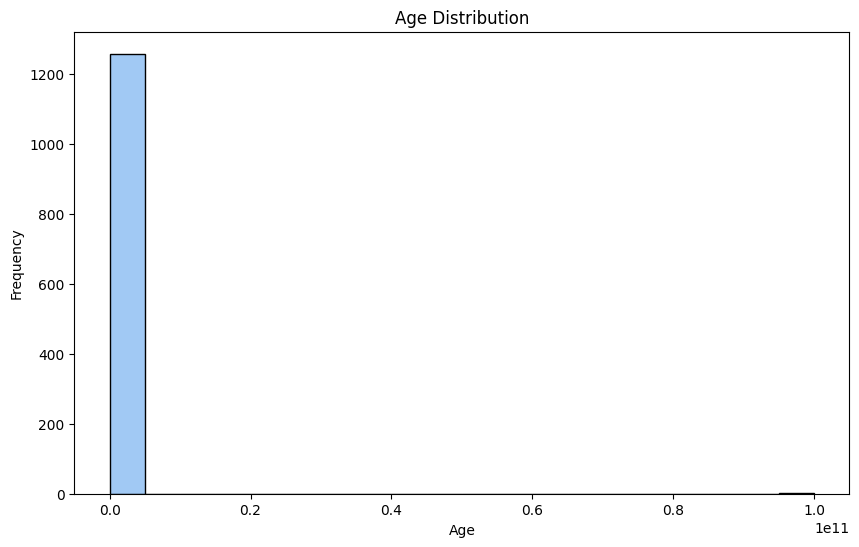

In [64]:
# 1. Age Distribution
plt.figure(figsize=(10, 6))
data['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

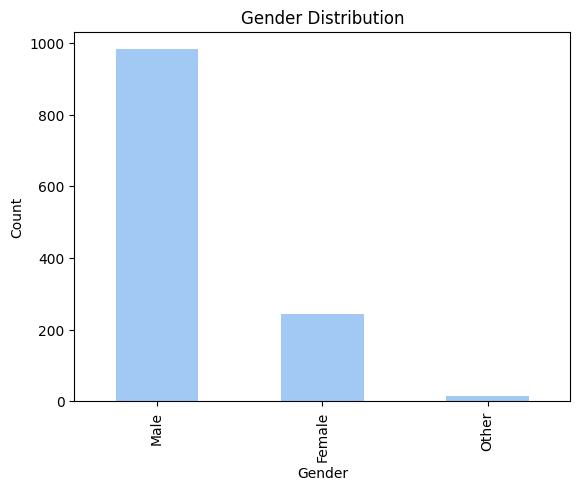

In [65]:
# 2. Gender Distribution
gender_distribution = data['Gender'].value_counts()
gender_distribution.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

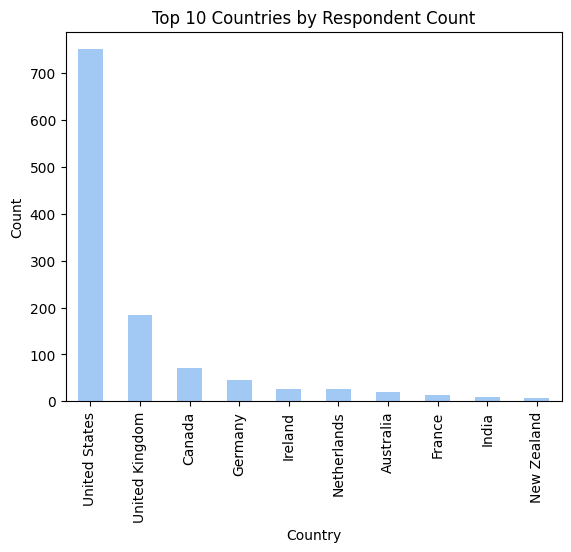

In [66]:
# 3. Country Distribution
country_distribution = data['Country'].value_counts().head(10)
country_distribution.plot(kind='bar')
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

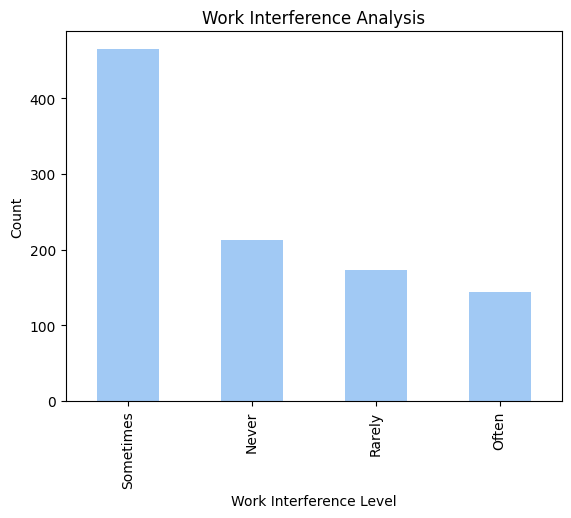

In [67]:
# 4. Work Interference Analysis
work_interference_counts = data['Work interfere'].value_counts()
work_interference_counts.plot(kind='bar')
plt.title('Work Interference Analysis')
plt.xlabel('Work Interference Level')
plt.ylabel('Count')
plt.show()

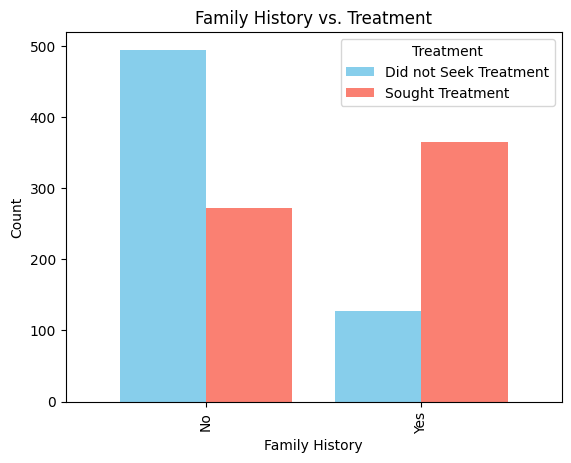

In [68]:
# 5. Family History and Treatment
family_history_treatment = pd.crosstab(data['Family history'], data['Treatment'])
family_history_treatment.plot(kind='bar', color=['skyblue', 'salmon'], width=0.8)
plt.title('Family History vs. Treatment')
plt.xlabel('Family History')
plt.ylabel('Count')

# Adding legend for better interpretation
plt.legend(title='Treatment', labels=['Did not Seek Treatment', 'Sought Treatment'], loc='upper right')

plt.show()

In [69]:
# Create a base map centered at the mean latitude and longitude
map_center = [data_merged['Latitude'].mean(), data_merged['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=2)

# Add markers for each data point
for index, row in data_merged.iterrows():
    # Customize the marker color (e.g., red)
    marker_color = 'pink'

    # Create a string with the popup content including 'Family History' and 'Mental Health Interview'
    popup_content = f"<b>Country:</b> {row['Country']}<br>" \
                    f"<b>Family History:</b> {row['Family history']}<br>" \
                    f"<b>Mental Health Interview:</b> {row['Mental health interview']}"

    # Create the marker and add it to the map
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=popup_content,
        icon=folium.Icon(color=marker_color),
    ).add_to(my_map)

# Display the map
display(my_map)